# Principal Component Analysis

### Cambio de bases ortogonales

Supongamos tenemos los siguientes puntos en un espacio vectorial euclideo:

\\[
\vec{p}_1=\begin{bmatrix}
1\\ 
1
\end{bmatrix}
\;\;\;\;
\vec{p}_2=\begin{bmatrix}
-1\\ 
1
\end{bmatrix}
\;\;\;\;
\vec{p}_3=\begin{bmatrix}
0\\ 
-1
\end{bmatrix}
\;\;\;\;
\vec{p}_4=\begin{bmatrix}
1\\ 
0
\end{bmatrix}
\\]

Estos vectores los podemos agrupar en una matrix $X$:
\\[
X=\begin{bmatrix}
{\vec{p}_1}^\intercal\\ 
{\vec{p}_2}^\intercal\\ 
{\vec{p}_3}^\intercal\\ 
{\vec{p}_4}^\intercal
\end{bmatrix}=
\begin{bmatrix}
1&1\\ 
-1&1\\ 
0&-1\\ 
1&0
\end{bmatrix}
\\]

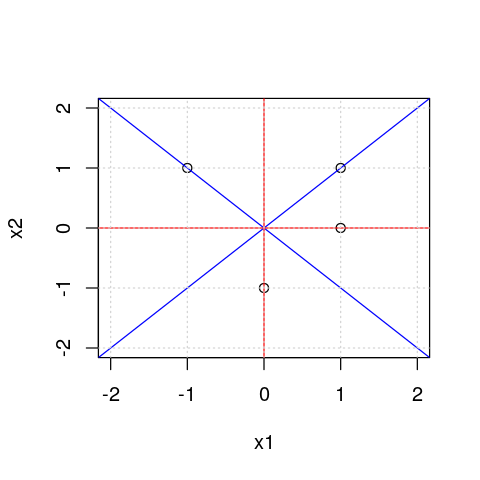

In [1]:
p1<-matrix(c(1,1),ncol=1)
p2<-matrix(c(-1,1),ncol=1)
p3<-matrix(c(0,-1),ncol=1)
p4<-matrix(c(1,0),ncol=1)
X<-rbind(t(p1),t(p2),t(p3),t(p4))
options(repr.plot.height=4,repr.plot.width=4)
plot(X[,1],X[,2],xlim=c(-2,2),ylim = c(-2,2),xlab="x1",ylab="x2")
abline(c(0,1),col="blue")
abline(c(0,-1),col="blue")
abline(h=0,col="red")
abline(v=0,col="red")
grid()

Pero queremos cambiar el eje, queremos realizar una transformación lineal del espacio vectorial.
Nuestro nuevo espacio vectorial vendrá dado por los vectores ortonormales:
\\[
\vec{u}_1=\begin{bmatrix}
\frac{1}{\sqrt{2}}\\ 
\frac{1}{\sqrt{2}}
\end{bmatrix}
\;\;\;\;
\vec{u}_2=\begin{bmatrix}
\frac{-1}{\sqrt{2}}\\ 
\frac{1}{\sqrt{2}}
\end{bmatrix}
\\]

In [2]:
u1<-matrix(c( 1/sqrt(2),1/sqrt(2)),ncol=1)
u2<-matrix(c(-1/sqrt(2),1/sqrt(2)),ncol=1)
paste("Son normales porque su norma es ",sum(u1^2))
paste("Son ortogonales porque su producto escalar es ",t(u1) %*% u2)

[1] "Son normales porque su norma es  1"

[1] "Son ortogonales porque su producto escalar es  0"

Los puntos $p_x$ de nuestro espacio se pueden representar mediante una combinación lineal de los vectores $\vec{u}_1$ y $\vec{u}_2$.

\\[
\vec{p}= \sum_i \alpha_i \vec{u}_i
\\]

\\[
\vec{p}_1=\begin{bmatrix}
1\\ 
1
\end{bmatrix}= \sqrt{2}·\vec{u}_1 +  0·\vec{u}_2
\\]
\\[
\vec{p}_2=\begin{bmatrix} 
-1\\ 
1
\end{bmatrix}= 0·\vec{u}_1 +  \sqrt{2}·\vec{u}_2
\\]
\\[
\vec{p}_3=\begin{bmatrix}
0\\ 
-1
\end{bmatrix}= \frac{-1}{\sqrt{2}}·\vec{u}_1 + \frac{-1}{\sqrt{2}}·\vec{u}_2
\\]
\\[
\vec{p}_4=\begin{bmatrix}
1\\ 
0
\end{bmatrix}= \frac{1}{\sqrt{2}}·\vec{u}_1 - \frac{1}{\sqrt{2}}·\vec{u}_2
\\]

Esto nos origina otra matriz con referencia al espacio vectorial $\vec{u_x}$ tal que:
\\[
U=\begin{bmatrix}
\sqrt{2}&0\\ 
0&\sqrt{2}\\ 
\frac{-1}{\sqrt{2}}&\frac{-1}{\sqrt{2}}\\ 
\frac{1}{\sqrt{2}}&\frac{-1}{\sqrt{2}}
\end{bmatrix}
=
\begin{bmatrix}
1&1\\ 
-1&1\\ 
0&-1\\ 
1&0
\end{bmatrix}·
\begin{bmatrix}
\frac{1}{\sqrt{2}}&\frac{-1}{\sqrt{2}}\\ 
\frac{1}{\sqrt{2}}&\frac{1}{\sqrt{2}}
\end{bmatrix}
\\]

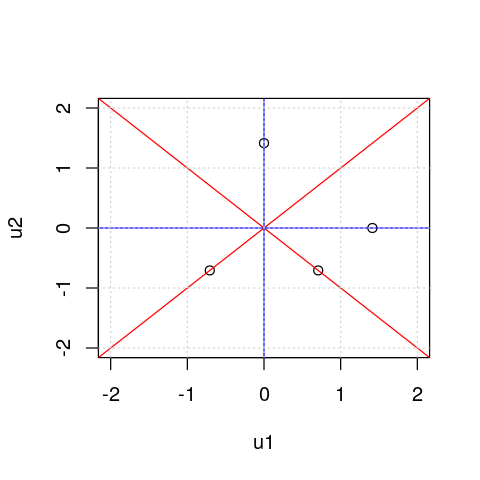

In [4]:
U<-X %*% cbind(u1, u2)
plot(U[,1],U[,2],xlim=c(-2,2),ylim = c(-2,2),xlab="u1",ylab="u2")
abline(c(0,1),col="red")
abline(c(0,-1),col="red")
abline(h=0,col="blue")
abline(v=0,col="blue")
grid()

In [5]:
paste("Si queremos recuperar la variable X original:")
U %*% solve(cbind(u1, u2))

[1] "Si queremos recuperar la variable X original:"

1,1
-1,1
0,-1
1,0


### Distribución de los datos

Los datos no se distribuyen igual entre todas las dimensiones.

Nos interesa encontrar la dirección de máxima variabilidad de los datos para, sobre esa dirección (vector), proyectar nuestros datos.
\\[
\vec{p}= \sum_i \alpha_i \vec{u}_i
\\]

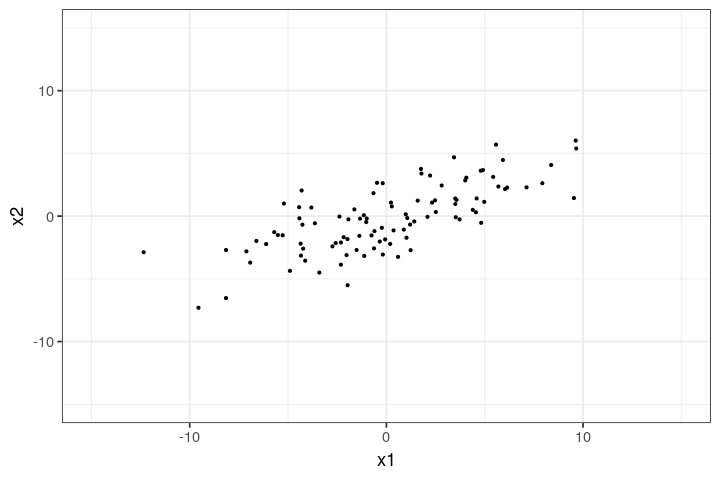

In [6]:
library(ggplot2)
options(repr.plot.height=4,repr.plot.width=6)

#set.seed(123)
set.seed(124)
N<-100
x1<-c(rnorm(N,mean=0,sd=5))
x2<-c(0.4*x1+rnorm(N,mean=0,sd=2))

mydata<-data.frame(x1,x2)
ggplot(mydata,aes(x=x1,y=x2))+geom_point(size=0.5)+    
        xlim(c(-15,15))+ylim(c(-15,15))+
        theme_bw()

La dirección de máxima dispersión va a venir dada por la **covarianza**:
##### Covarianza

La covarianza es un valor que indica el grado de variación **lineal** conjunta de dos variables aleatorias respecto a sus medias.

Supongamos que queremos comparar dos variables aleatorias X e Y:
* Tendremos alta covarianza (positiva) cuando, para valores altos de X, tengamos mayoritariamente valores altos de Y
* Tendremos baja covarianza (negativa) cuando, para valores altos de X, tengamos mayoritariamente valores bajos de Y
* Tendremos covarianza cercana a 0, para valores altos de X, los valores de Y pueden ser altos o bajos por igual


Su formula es la siguiente:
\\[
cov(X,Y) = \frac{1}{N} \sum _{i=1}^N \left( x_i-\bar{x} \right)\left( y_i-\bar{y} \right)
\\]

Recordemos la formula de la varianza:
\\[
Var(x) =  \frac{1}{N} \sum _{i=1}^N \left( x_i-\bar{x} \right)^2
\\]

La covarianza de una variable aleatoria consigo misma es igual a la varianza:
\\[
cov(X,X) = Var(X)
\\]

En R la calculamos con la función *cov(x,y)*



In [7]:
M<-matrix(c(mydata$x1,mydata$x2),ncol=2,byrow = FALSE)
paste("La covarianza:")
cov(M)
paste("es proporcional al producto de la matriz consigo misma:")
t(M) %*% M

[1] "La covarianza:"

19.529370,8.566718
8.566718,7.004260


[1] "es proporcional al producto de la matriz consigo misma:"

1933.6390,847.2697
847.2697,696.4380


### Autovectores y autovalores

Un autovector (*eigenvector*) de una matrix $A$, es un vector cuyo valor solo cambia por un escalar $\lambda$, llamado autovalor (*eigenvalue*), cuando se multiplica por la matriz $A$ 

In [8]:
A<-matrix(c(1,1,1,3),ncol=2)
A

1,1
1,3


In [9]:
eigen(A)

eigen() decomposition
$values
[1] 3.4142136 0.5857864

$vectors
          [,1]       [,2]
[1,] 0.3826834 -0.9238795
[2,] 0.9238795  0.3826834


In [10]:
v1<-eigen(A)$vectors[,1]
l1<-eigen(A)$values[1]
A %*% v1
matrix(l1*v1,ncol=1)

1.306563
3.154322


1.306563
3.154322


Esto significa que si tenemos una serie de puntos (en rojo), al ser multiplicados por la matriz $A$ se van a **desplazar** siguiendo la **dirección** dada por los autovectores con la **magnitud** dada por los autovalores.

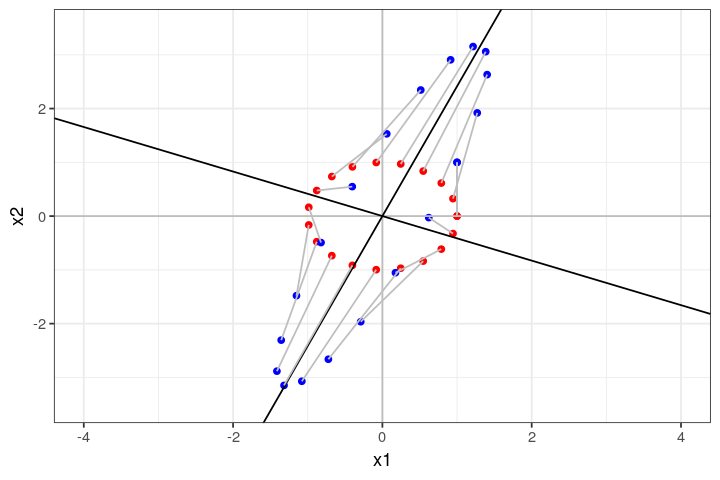

In [11]:
N<-20
df<-data.frame(x1=cos(seq(0,2*pi,length.out = N)),x2=sin(seq(0,2*pi,length.out = N)),
               x1n=rep(NA,N),x2n=rep(NA,N))
for (i in 1:nrow(df)){
    v<-A %*% matrix(unlist(df[i,1:2]),ncol=1)
    df$x1n[i]<-v[1]
    df$x2n[i]<-v[2]
}
eigv<-eigen(A)$vectors

ggplot(df)+geom_point(aes(x=x1,y=x2),color="red")+
    geom_point(aes(x=x1n,y=x2n),color="blue")+
    geom_hline(yintercept = 0,color="gray")+
    geom_vline(xintercept = 0,color="gray")+
    geom_abline(intercept = 0,slope = eigv[2,1]/eigv[1,1],color="black")+
    geom_abline(intercept = 0,slope = eigv[2,2]/eigv[1,2],color="black")+
    geom_segment(aes(x = x1, y = x2, xend=x1n,yend=x2n),color="gray")+
    xlim(c(-4,4))+ylim(c(-3.5,3.5))+
    theme_bw()

### Análisis de componentes principales

En este caso vamos a realizar una transformación de nuestros datos originales en un nuevo espacio vectorial.


Nos interesa encontrar la dirección de máxima variabilidad de los datos para, sobre esa dirección (vector), proyectar nuestros datos sobre una base **ortonormal**.

\\[
\vec{p}= \sum_i \alpha_i \vec{u}_i
\\]

Los autovectores de la matriz de covarianza de nuestros datos o $A^\intercal·A$ nos proporcionan esa base vectorial sobre la cual proyectar nuestros datos.
* Cuanto mayor sea el *autovalor*, más importancia, más varianza, tendrá la proyección de los datos sobre el *autovector* correspondiente.
* Los autovalores de la matriz de covarianza de A  coinciden con la diagonal de la matriz de covarianza de la proyección de  A  sobre la base vectorial de autovectores

eigen() decomposition
$values
[1] 2364.1012  265.9758

$vectors
           [,1]       [,2]
[1,] -0.8915351  0.4529516
[2,] -0.4529516 -0.8915351


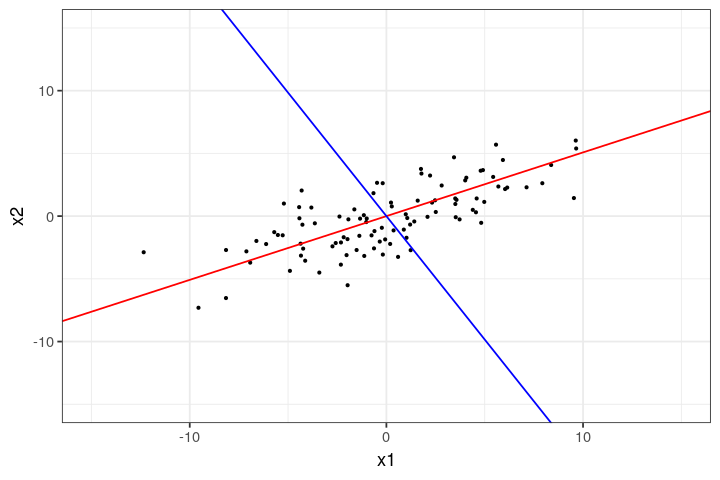

In [12]:
M<-matrix(c(mydata$x1,mydata$x2),ncol=2)
eigv<-eigen(t(M) %*% M)$vector
eigen(t(M) %*% M)

ggplot(mydata,aes(x=x1,y=x2))+geom_point(size=0.5)+    
        geom_abline(intercept = 0,slope = eigv[2,1]/eigv[1,1],color="red")+
        geom_abline(intercept = 0,slope = eigv[2,2]/eigv[1,2],color="blue")+
        xlim(c(-15,15))+ylim(c(-15,15))+
        theme_bw()

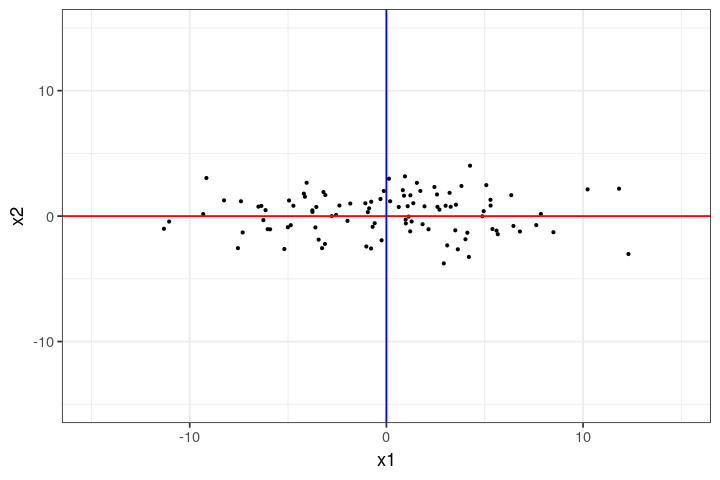

In [13]:
mydata_rot<-data.frame(x1=M %*% eigv[,1],x2=M %*% eigv[,2])


ggplot(mydata_rot,aes(x=x1,y=x2))+geom_point(size=0.5)+    
        geom_hline(yintercept = 0,color="red")+
        geom_vline(xintercept = 0,color="blue")+
        xlim(c(-15,15))+ylim(c(-15,15))+
        theme_bw()

In [14]:
# Los autovalores de la matriz de covarianza de A  coinciden con 
# la diagonal de la matriz de covarianza de la proyección de  A  sobre la base vectorial de autovectores
var(mydata_rot)
eigen(var(M))$values

,x1,x2
x1,23.878516685,-0.006383611
x2,-0.006383611,2.655113161


[1] 23.878519  2.655111

### Diferencias entre PCA y regresión lineal

La regresión lineal busca minimizar el error cuadrático medio:
\\[
MSE = {1 \over n} \sum_{i=0}^n{(Y-\hat{Y})^2}
\\]
En PCA buscamos maximizar la proyección de nuestros datos sobre la nueva base vectorial.

En la siguiente figura se ve claro:
* PCA busca minimizar la distancia de los puntos a la línea roja de forma perpendicular (línea discontinua)
* Regresión linear busca minimizar la distancia de los puntos a la línea verde de forma vertical (línea discontinua)

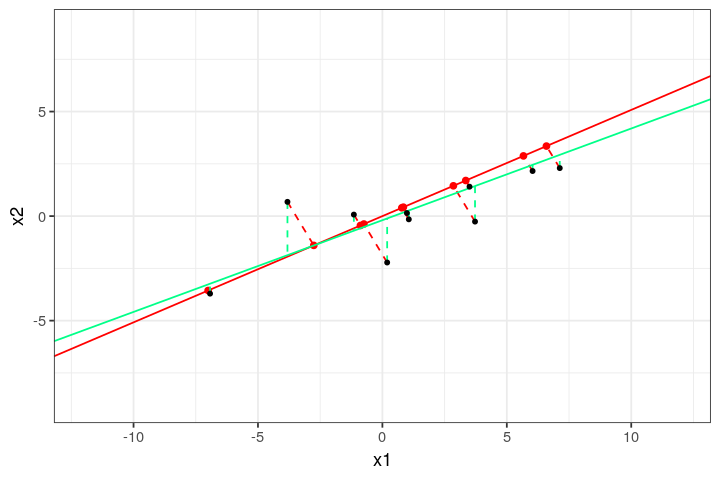

In [15]:
mydata_pca1<-as.data.frame(x=matrix(mydata_rot$x1,ncol=1) %*% t(eigv[,1]))
colnames(mydata_pca1)<-c("x1pca","x2pca")
mydata_total<-cbind(mydata,mydata_pca1)

linear_model<-lm(mydata,formula=x2~x1)
mydata_total$x2lm<-predict(linear_model,mydata)

ggplot(mydata_total[1:10,],aes(x=x1,y=x2))+
        geom_point(aes(x=x1pca,y=x2pca),color="red")+
        geom_abline(intercept = 0,slope = eigv[2,1]/eigv[1,1],color="red")+
        #geom_abline(intercept = 0,slope = eigv[2,2]/eigv[1,2],color="blue")+
        geom_segment(aes(x = x1, y = x2, xend=x1pca,yend=x2pca),color="red",linetype = "dashed")+
        geom_abline(intercept = linear_model$coefficients[1],slope = linear_model$coefficients[2],color="#00FF88")+
        geom_segment(aes(x = x1, y = x2, xend=x1,yend=x2lm),color="#00FF88",linetype = "dashed")+
        geom_point(size=1)+
        xlim(c(-12,12))+ylim(c(-9,9))+
        theme_bw()

### Calculo en R

En R podemos usar el comando 
```
prcomp(mydata)
```
para hacer un PCA, devuelve 3 listas de interés:
* x : aquí se encuentran los datos de la matriz original proyectados sobre los autovectores. Están ordenados de mayor a menor autovalor.
* sdev: Es la desviación estandard de cada columna de x. Su cuadrado es el correspondiente autovalor de cov(x).
* rotation: matriz con los autovectores


[1] "Mutiplicacion"


eigen() decomposition
$values
[1] 2364.1012  265.9758

$vectors
           [,1]       [,2]
[1,] -0.8915351  0.4529516
[2,] -0.4529516 -0.8915351


[1] "Covarianza"


eigen() decomposition
$values
[1] 23.878519  2.655111

$vectors
           [,1]       [,2]
[1,] -0.8916713  0.4526834
[2,] -0.4526834 -0.8916713


[1] "Función prcomp"


Standard deviations (1, .., p=2):
[1] 4.886697 1.639093

Rotation (n x k) = (2 x 2):
         PC1        PC2
x1 0.8915351 -0.4529516
x2 0.4529516  0.8915351

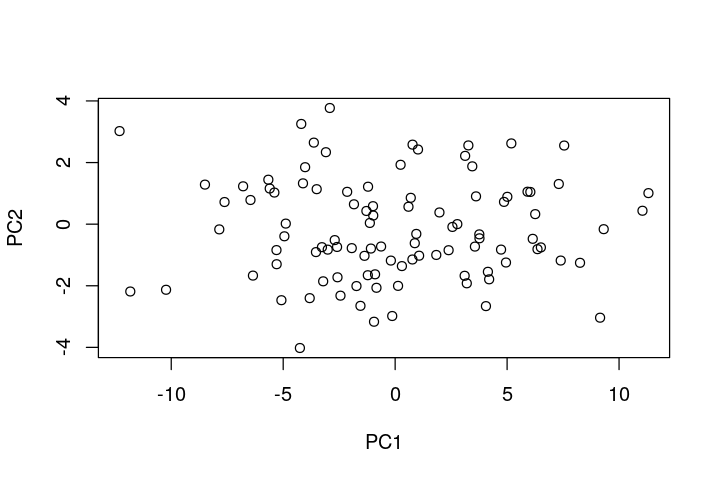

In [16]:
M<-matrix(c(mydata$x1,mydata$x2),ncol=2)
print("Mutiplicacion")
eigen(t(M)%*%M)
print("Covarianza")
eigen(cov(mydata))
print("Función prcomp")
prmydata<-prcomp(mydata,center = FALSE, scale. = FALSE)
prmydata

plot(prmydata$x[,1:2])

In [17]:
eigen(cov(prmydata$x))

eigen() decomposition
$values
[1] 23.878519  2.655111

$vectors
              [,1]          [,2]
[1,] -0.9999999548 -0.0003007817
[2,]  0.0003007817 -0.9999999548


Evidentemente el resultado de la matrix 'prmydata$x' coincide con el obtenido de la forma anterior si utilizamos la matriz de rotación con los datos originales:

In [18]:
print("Valor dado por la función prcomp")
prmydata$x[1,]
print("Multiplicando por la matriz de rotación")
matrix(unlist(mydata[1,]),nrow=1) %*% prmydata$rotation
print("Con función predict")
predict(prmydata,newdata = mydata[1,])

[1] "Valor dado por la función prcomp"


PC1        PC2 
-7.8540759 -0.1696237

[1] "Multiplicando por la matriz de rotación"


PC1,PC2
-7.854076,-0.1696237


[1] "Con función predict"


,PC1,PC2
1,-7.854076,-0.1696237


Si nos llega un nuevo vector podemos aplicar la transformada para colocarla en el espacio proyectado por los autovectores del PCA:

In [19]:
new_vector<-matrix(c(1,1),nrow=1)
colnames(new_vector)<-c('x1','x2')
print("Multiplicando por la matriz de rotación")
new_vector %*% prmydata$rotation
print("Con Predict")
predict(prmydata,newdata = new_vector)

[1] "Multiplicando por la matriz de rotación"


PC1,PC2
1.344487,0.4385835


[1] "Con Predict"


PC1,PC2
1.344487,0.4385835


La matriz de autovalores (también llamada matriz de rotación) es una matriz ortogonal. Esto sifnigica que su inversa es su transpuesta:
\\[
{V} ^{\operatorname {T} }=\mathbf {V} ^{-1}
\\]

In [20]:
solve(prmydata$rotation)

,x1,x2
PC1,0.8915351,0.4529516
PC2,-0.4529516,0.8915351


In [21]:
t(prmydata$rotation)

,x1,x2
PC1,0.8915351,0.4529516
PC2,-0.4529516,0.8915351


Para obtener el valor original solo tienes que multiplicar el resultado otra vez:

In [22]:
new_vector<-matrix(c(1,1),nrow=1,dimnames=list(1,c('x1','x2')))
out<-predict(prmydata,newdata = new_vector)

In [23]:
out %*% t(prmydata$rotation)

,x1,x2
1,1,1


#### PCA como compresión de información

Podemos usar PCA para comprimir los datos, reducir la información a los autovectores más importantes y eliminar el ruido

In [24]:
mydata_pca<-predict(prmydata,newdata = mydata)

In [25]:
mydata_pca[,2]<-0

In [26]:
mydata_filtered<- mydata_pca %*% t(prmydata$rotation)

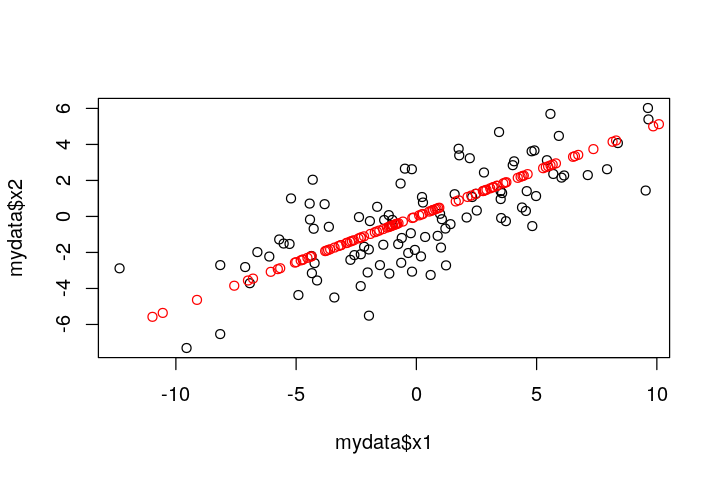

In [27]:
plot(mydata$x1,mydata$x2)
points(mydata_filtered[,1],mydata_filtered[,2],col="red")

#### Ejemplo Iris

Vamos a aplicar PCA al dataset de Iris

In [1]:
iris_data<-iris[,1:4]

for (i in 1:ncol(iris_data)){     
    mn<-mean(iris_data[,i],na.rm = T)
    sd<-sd(iris_data[,i],na.rm = T)
    
    iris_data[,i]<-(iris_data[,i]-mn)/sd    
}

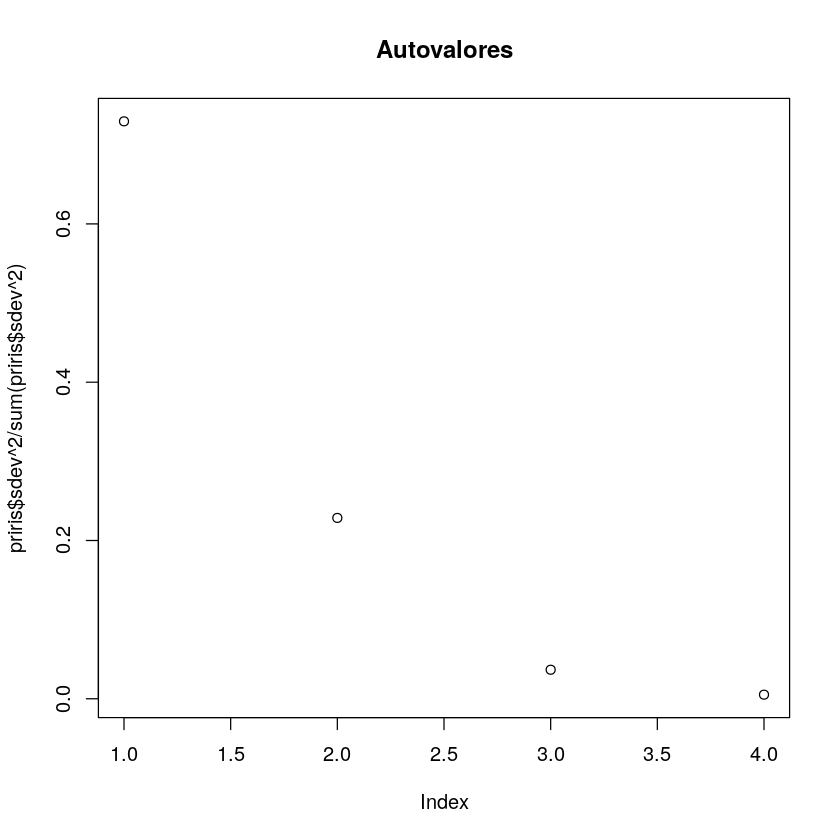

In [2]:
#Utilizamos prcomp para calcular el pca
priris<-prcomp(iris_data,center = FALSE, scale = FALSE)
#Comprobamos que los dos primeros autovalores contienen aproximadamente el 90% de la varianza
plot(priris$sdev^2/sum(priris$sdev^2),main="Autovalores")

            
              1  2  3
  setosa      0  0 50
  versicolor 39 11  0
  virginica  14 36  0

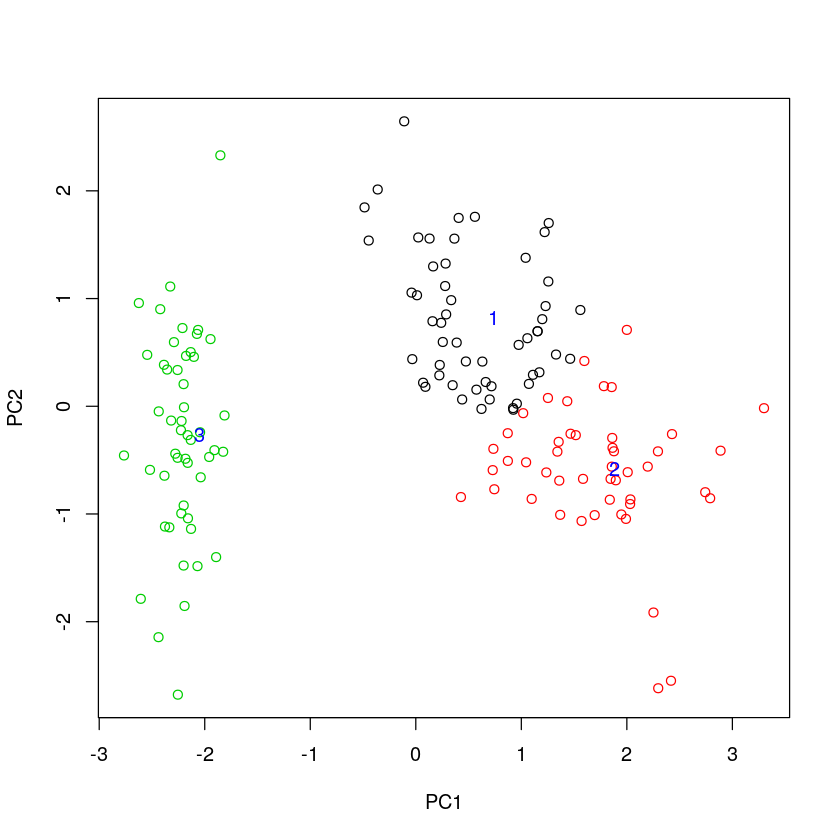

In [6]:
number_of_clusters<-3
number_of_pca<-2
my_clust<-kmeans(priris$x[,c(1:number_of_pca)],number_of_clusters)
plot(priris$x[,c(1,2)],col=my_clust$cluster)
text(x=my_clust$centers[,1], 
     y=my_clust$centers[,2], 
     cex=1, pos=4, labels=(1:nrow(my_clust$centers)),col="blue")

table(iris$Species,my_clust$cluster)

            
              0  1  2
  setosa      1 49  0
  versicolor  0  0 50
  virginica   3  0 47

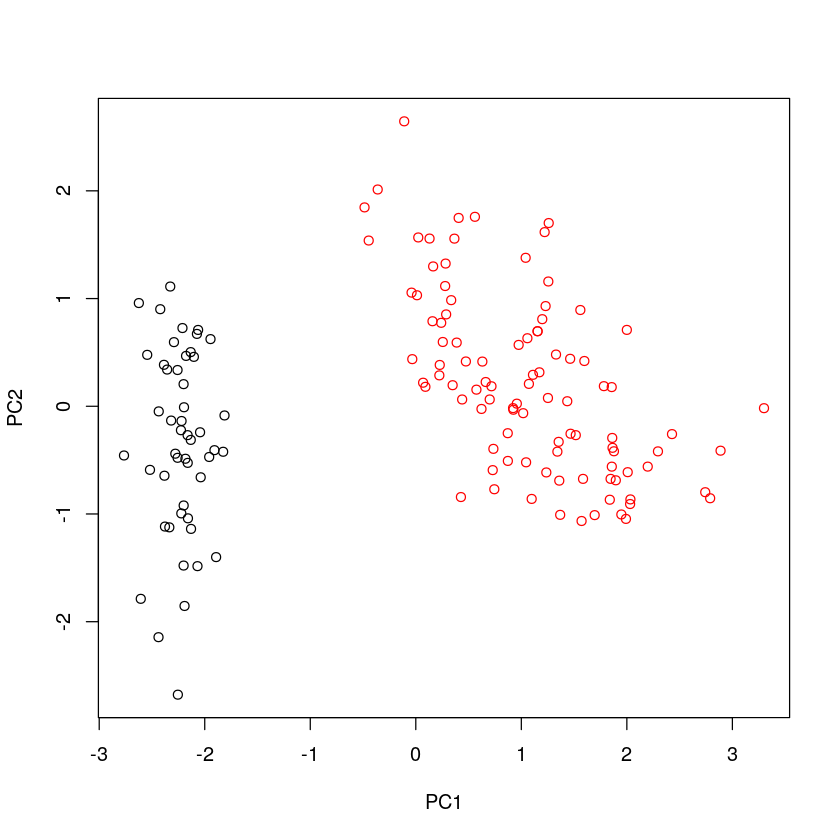

In [7]:
library(dbscan)
number_of_pca<-2
#my_clust<-hdbscan(priris$x[,c(1:number_of_pca)],minPts=4)
my_clust<-dbscan(priris$x[,c(1:number_of_pca)],minPts=5,eps=0.8)
plot(priris$x[,c(1,2)],col=my_clust$cluster)
table(iris$Species,my_clust$cluster)

#### Ejemplo proteinas

Vamos a aplicar PCA al dataset de proteinas

In [8]:
mouse<-read.csv("data/Data_Cortex_Nuclear.csv")
mouse_data<-mouse[,2:78]
for (i in 1:ncol(mouse_data)){
        
    mn<-mean(mouse_data[,i],na.rm = T)
    sd<-sd(mouse_data[,i],na.rm = T)
    mouse_data[is.na(mouse_data[,i]),i]<-mn
    
    mouse_data[,i]<-(mouse_data[,i]-mn)/sd    
}

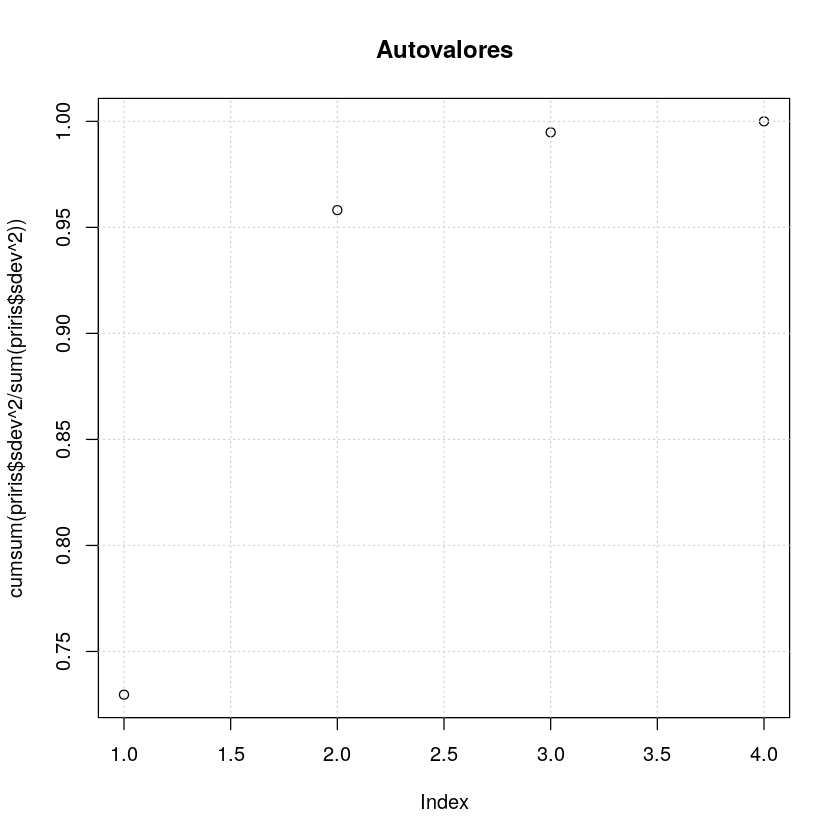

In [9]:
#Utilizamos prcomp para calcular el pca
prmouse_data<-prcomp(mouse_data,center = FALSE, scale = FALSE)
#Comprobamos que los 20 primeros autovalores contienen aproximadamente el 90% de la varianza
plot(cumsum(priris$sdev^2/sum(priris$sdev^2)),main="Autovalores")
grid()

Vamos a probar a hacer un *k-means* con solo dos dimensiones del PCA

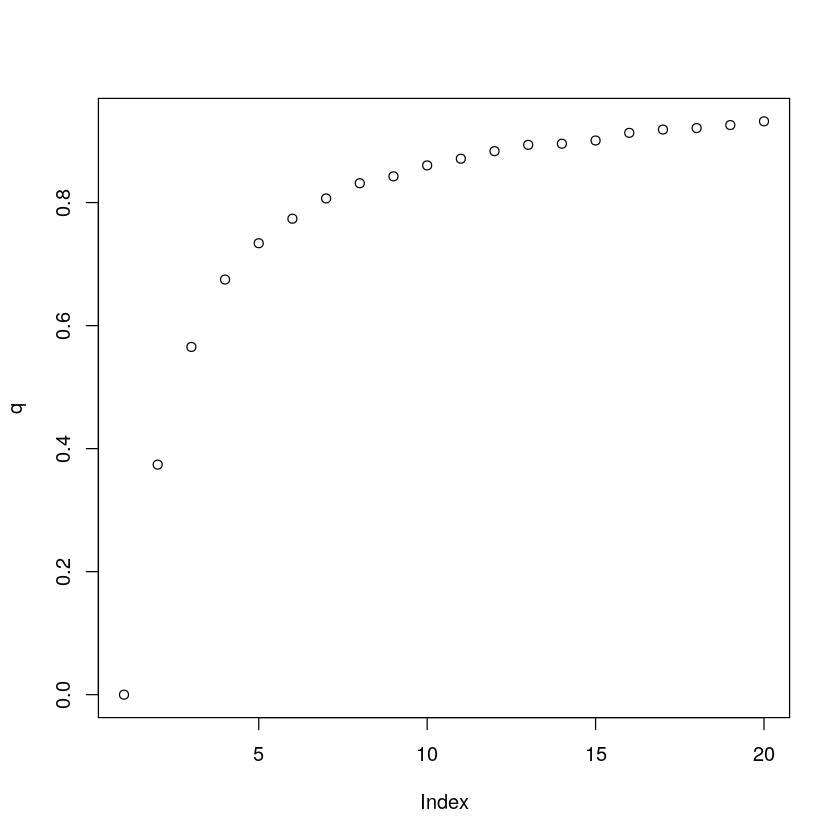

In [10]:
mouse_data14<-prmouse_data$x[,1:2]
q<-c()
for (k in 1:20){
    myclust<-kmeans(mouse_data14,k)
    q[k]<-myclust$betweenss/myclust$totss
}
plot(q)

        
          1  2  3  4  5  6  7  8  9 10
  c-CS-m 11 11  0 13  5 32 19 31 11 17
  c-CS-s 22  3  0  4  0 20 26 22 23 15
  c-SC-m  0 59 21  2 21 15  0  0  0 32
  c-SC-s  0 21  7 11 27 13  0  0  1 55
  t-CS-m 40  0  0  0 11 15  9 25 30  5
  t-CS-s 33  3  1  0  1 16  6 19 20  6
  t-SC-m  0 29 28 30  2  5  0  0  0 41
  t-SC-s  0 15  1 31 23 34  1  0  2 28

        
          1  2  3  4  5  6  7  8  9 10
  c-CS-m 43 16 23  5 11 17 11  0  0 24
  c-CS-s 24 22 29  0  3 28  0  0 15 14
  c-SC-m  0 10  0 31 31  1 70  7  0  0
  c-SC-s 12  5  0 10 23  0 70 15  0  0
  t-CS-m 12 38 38  0  2  0  0  0  0 45
  t-CS-s 11 18 41  3  0 11  0  0  0 21
  t-SC-m 10  0  0 34 20 10 48 13  0  0
  t-SC-s 26 14  0  8  2 18  5 44  0 18

     
        1   2   3   4   5   6   7   8   9  10
  C/S 106  17   1  17  17  83  60  97  84  43
  S/C   0 124  57  74  73  67   1   0   3 156

     
        1   2   3   4   5   6   7   8   9  10
  C/S  90  94 131   8  16  56  11   0  15 104
  S/C  48  29   0  83  76  29 193  79   0  18

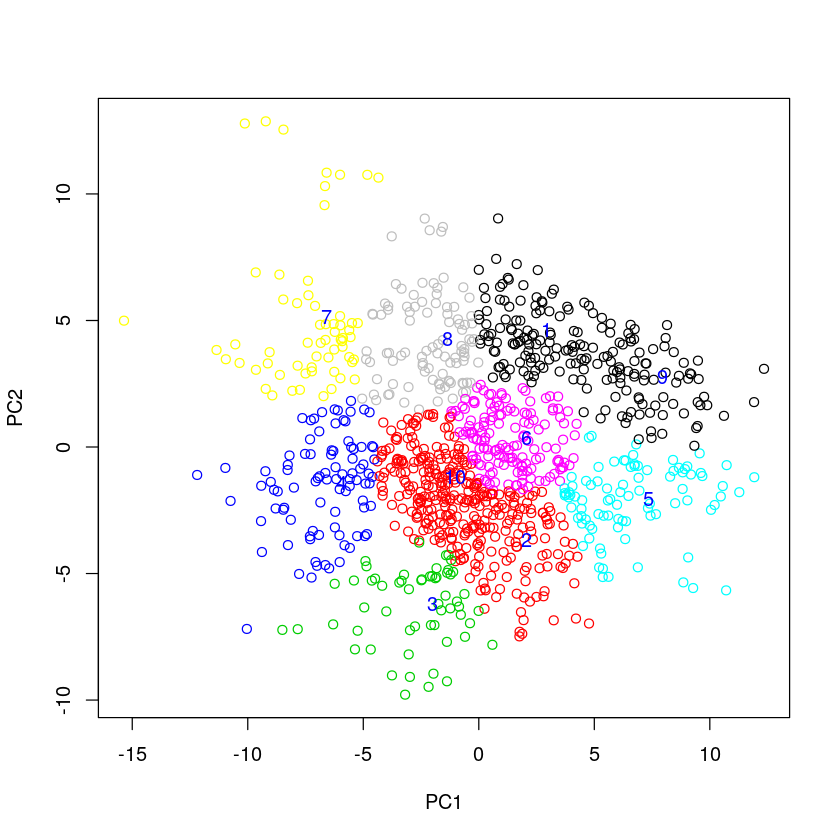

In [17]:
set.seed(123)
myclustpca<-kmeans(mouse_data14,10)
myclust<-kmeans(mouse_data,10)

table(mouse$class,myclustpca$cluster)
table(mouse$class,myclust$cluster)
table(mouse$Behavior,myclustpca$cluster)
table(mouse$Behavior,myclust$cluster)


plot(prmouse_data$x[,c(1,2)],col=myclustpca$cluster)
text(x=myclustpca$centers[,1], y=myclustpca$centers[,2], cex=1, pos=4, labels=(1:nrow(myclustpca$centers)),col="blue")


#### Ejemplo regresión logística con PCA - dataset Cancer

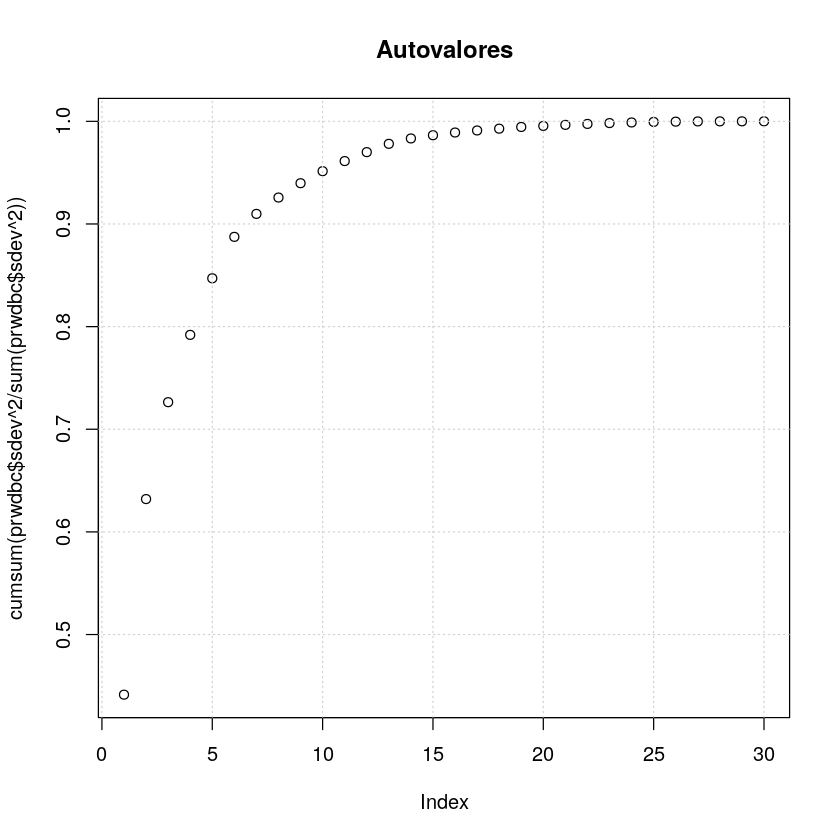

In [12]:
library(pracma)
set.seed(1234)
wdbc<-read.csv("data/wdbc.data",col.names=c("id","diagnosis",paste0("c",1:30)))
diagnosis<-wdbc$diagnosis
wdbc<-wdbc[,3:ncol(wdbc)]

prwdbc<-prcomp(wdbc,center = TRUE, scale. = TRUE)
#Comprobamos que los 5 primeros autovalores contienen aproximadamente el 90% de la varianza
plot(cumsum(prwdbc$sdev^2/sum(prwdbc$sdev^2)),main="Autovalores")
grid()

In [13]:
pca_data<-as.data.frame(prwdbc$x[,1:2])
pca_data$diagnosis<-diagnosis
idx<-sample(1:nrow(pca_data),round(nrow(pca_data)*0.7))
wdbc.train_norm<-pca_data[idx,]
wdbc.test_norm<-pca_data[-idx,]
model_wdbc<-glm(data=wdbc.train_norm,formula=diagnosis~.,family=binomial(link='logit')) 



y_predict<-predict(model_wdbc,wdbc.test_norm)
y_factor<-as.factor(ifelse(y_predict<0,"B","M"))

table(y_factor,wdbc.test_norm$diagnosis)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


        
y_factor  B  M
       B 97  7
       M  3 63

In [14]:
str(pca_data)

'data.frame':	568 obs. of  3 variables:
 $ PC1      : num  -2.41 -5.76 -7.11 -3.96 -2.38 ...
 $ PC2      : num  3.76 1.05 -10.33 1.94 -3.97 ...
 $ diagnosis: Factor w/ 2 levels "B","M": 2 2 2 2 2 2 2 2 2 2 ...


   
      1   2
  B 341  16
  M  37 174

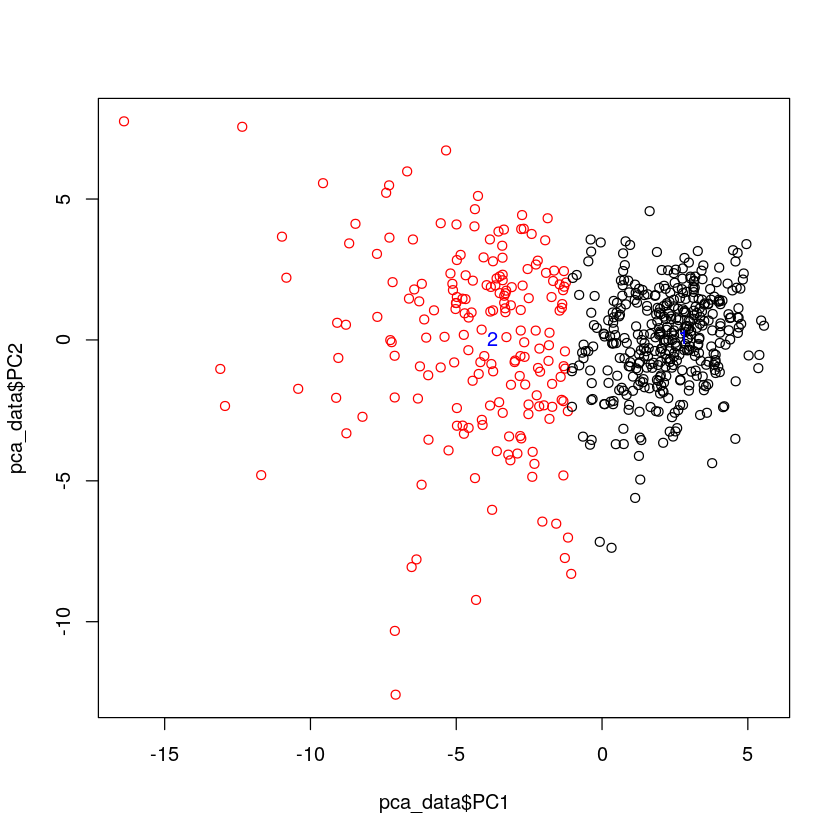

In [15]:
myclustpca<-kmeans(pca_data[,1:2],2)

plot(pca_data$PC1,pca_data$PC2,col=myclustpca$cluster)
text(x=myclustpca$centers[,1], y=myclustpca$centers[,2], cex=1, pos=4, labels=(1:nrow(myclustpca$centers)),col="blue")
table(pca_data$diagnosis,myclustpca$cluster)